### Student Test Score Analysis

Visualize test score distributions for students from different
schools and identify top-performing groups

Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Step 2: Create a sample dataset

In [2]:
data = {
    'Student_ID': range(101, 111),
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Math_Score': [85, 92, 78, 88, 76, 95, 89, 72, 84, 91],
    'Science_Score': [88, 95, 80, 90, 78, 94, 87, 75, 86, 93],
    'English_Score': [79, 88, 85, 91, 72, 90, 84, 78, 81, 96]
}
df = pd.DataFrame(data)
df


,Student_ID,Gender,Math_Score,Science_Score,English_Score
0,101,Male,85,88,79
1,102,Female,92,95,88
2,103,Male,78,80,85
3,104,Female,88,90,91
4,105,Male,76,78,72
5,106,Female,95,94,90
6,107,Male,89,87,84
7,108,Female,72,75,78
8,109,Male,84,86,81
9,110,Female,91,93,96


# Step 3: Explore and summarize the data

In [3]:
# Display the first 5 rows of the DataFrame
print("First 5 rows:")
print(df.head())

# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
   Student_ID  Gender  Math_Score  Science_Score  English_Score
0         101    Male          85             88             79
1         102  Female          92             95             88
2         103    Male          78             80             85
3         104  Female          88             90             91
4         105    Male          76             78             72

Summary statistics:
       Student_ID  Math_Score  Science_Score  English_Score
count    10.00000   10.000000       10.00000      10.000000
mean    105.50000   85.000000       86.60000      84.400000
std       3.02765    7.527727        6.93141       7.136759
min     101.00000   72.000000       75.00000      72.000000
25%     103.25000   79.500000       81.50000      79.500000
50%     105.50000   86.500000       87.50000      84.500000
75%     107.75000   90.500000       92.25000      89.500000
max     110.00000   95.000000       95.00000      96.000000

Missing values:
Student_ID       0
Gende

# Step 4: Add new calculated columns

In [4]:
# Calculate the average score for each student
df['Average_Score'] = df[['Math_Score', 'Science_Score', 'English_Score']].mean(axis=1)

# Determine the passing status (e.g., passing score > 70)
df['Status'] = np.where(df['Average_Score'] > 70, 'Pass', 'Fail')

print("DataFrame with new columns:")
df


DataFrame with new columns:


,Student_ID,Gender,Math_Score,Science_Score,English_Score,Average_Score,Status
0,101,Male,85,88,79,84.000000,Pass
1,102,Female,92,95,88,91.666667,Pass
2,103,Male,78,80,85,81.000000,Pass
3,104,Female,88,90,91,89.666667,Pass
4,105,Male,76,78,72,75.333333,Pass
5,106,Female,95,94,90,93.000000,Pass
6,107,Male,89,87,84,86.666667,Pass
7,108,Female,72,75,78,75.000000,Pass
8,109,Male,84,86,81,83.666667,Pass
9,110,Female,91,93,96,93.333333,Pass


# Step 5: Analyze performance by gender

In [5]:
# Group by gender and get the mean scores
gender_performance = df.groupby('Gender')[['Math_Score', 'Science_Score', 'English_Score', 'Average_Score']].mean()
print("Average scores by gender:")
print(gender_performance)


Average scores by gender:
        Math_Score  Science_Score  English_Score  Average_Score
Gender                                                         
Female        87.6           89.4           88.6      88.533333
Male          82.4           83.8           80.2      82.133333


# Step 6: Visualize the score distribution

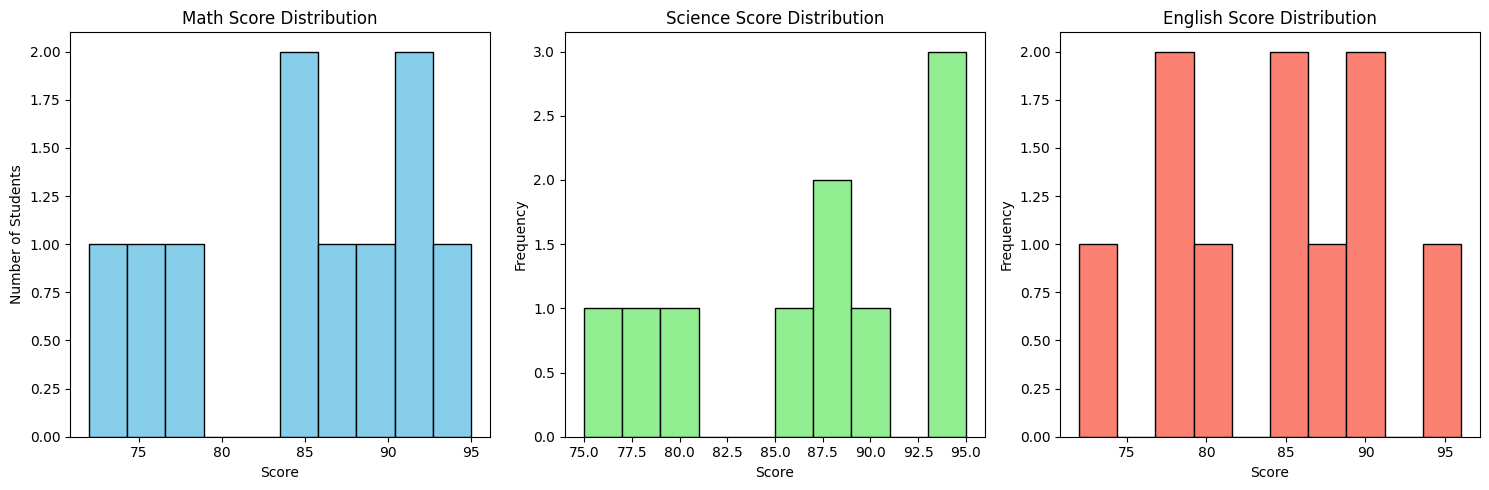

In [6]:
# Create a histogram for each subject score
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df['Math_Score'].plot(kind='hist', ax=axes[0], title='Math Score Distribution', color='skyblue', edgecolor='black')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Number of Students')

df['Science_Score'].plot(kind='hist', ax=axes[1], title='Science Score Distribution', color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Score')

df['English_Score'].plot(kind='hist', ax=axes[2], title='English Score Distribution', color='salmon', edgecolor='black')
axes[2].set_xlabel('Score')

plt.tight_layout()
plt.show()


# Step 7: Visualize gender performance

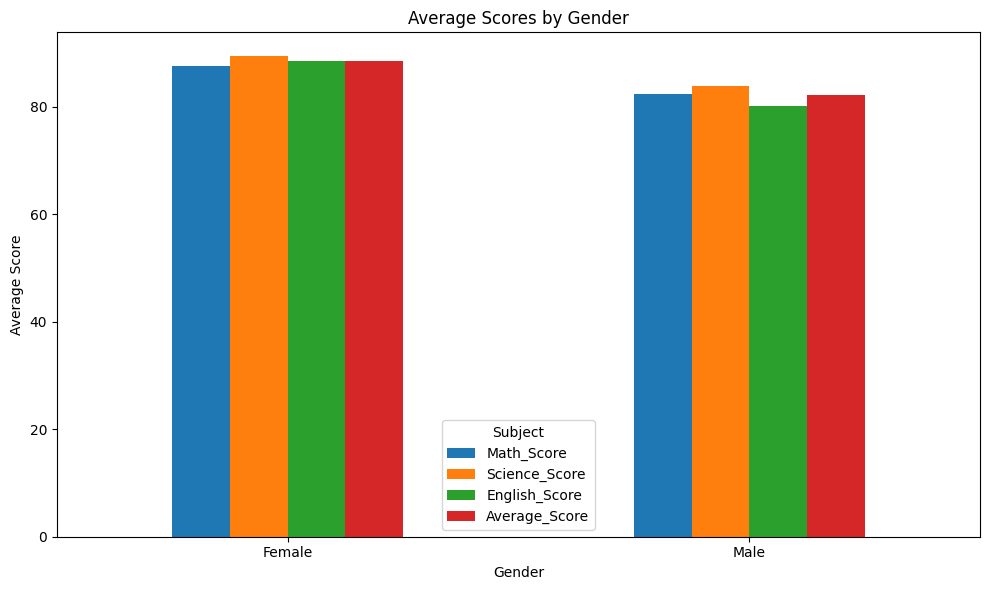

In [7]:
gender_performance.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.legend(title='Subject')
plt.tight_layout()
plt.show()
